# Band Ratios & Spectral Features

The BandRatios project explores properties of band ratios, and how they relate to other spectral measures.

This notebook walks through how band ratio measures and spectral features are computed. 



In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')

from fooof.sim import gen_power_spectrum
from fooof.plts import plot_spectrum, plot_spectrum_shading

In [2]:
# Import custom project code
import sys
sys.path.append('../bratios')
from ratios import *
#from settings import *

## What is a Band Ratio

This project explores frequency band ratios, a metric used in spectral analysis since at least the 1960's to characterize cognitive functions such as vigilance, aging, memory among other. In clinical work, band ratios have also been used as a biomarker for diagnosing and monitoring of ADHD, diseases of consciousness, and nervous system disorders such as Parkinson's disease.

Given a power spectrum, a band ratio is the ratio of average power within a band between two frequency ranges. 

Typically ratios are calculated as:

`'avg(low band power)' / 'avg(high band power)'`

The following cell generates a power spectral density (PSD) and highlights the frequency ranges used to calculate a theta/beta band ratio.

In [18]:
# Settings
theta_band = [4, 8]
beta_band = [20, 30]
freq_range = [1, 35]

# Collect settings to simulate a power spectrum
def_ap = [0, 1]
def_osc = [[6, 0.25, 1], [10, 0.4, 0.75] ,[25, 0.2, 1.5]]

In [26]:
# Plot Settings
shade_colors = ['#2e19ff', '#008a0b']
shade_colors = '#874800'

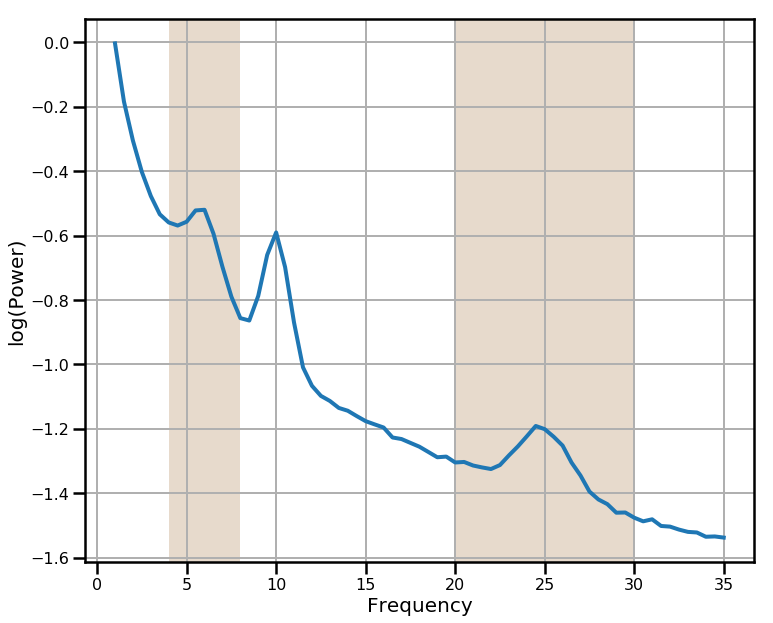

In [27]:
# Generate a simulated power spectrum
fs, ps = gen_power_spectrum(freq_range, def_ap, def_osc)

# Plot and save out our shaded power spectrum plot
fig = plot_spectrum_shading(fs, ps, [theta_band, beta_band],
                            shade_colors=shade_colors, log_powers=True, linewidth=4)
plt.savefig("../figures/OverviewFigs/RatioExample.png", dpi=300)

# Calculate theta/beta ratios 

### Average Power Ratio

The most cannonical way of calculating band ratios is to take average power in the low-band and divide it by the average power in the high-band. 

Average power is calculated as the sum of all discrete power values divided by number on power values in that band.

In [21]:
ratio = calc_band_ratio(fs, ps, theta_band, beta_band)
print('Theta-beta ratio is: {:1.4f}'.format(ratio))

Theta-beta ratio is: 5.0137


And there you have it - our first computed frequency band ratio!

# The FOOOF Model

To compare band ratios, and measure other spectral features from power spectra, we will use the [FOOOF](https://github.com/fooof-tools/fooof) library. 

Briefly, the FOOOF algorithm parameterizes neural power spectra, measuring both periodic (oscillatory) and aperiodic features. 

Each identified oscillation is parameterized as a peak, fit as a gaussian, which provides us with measures of the center frequency, power and bandwidth of that oscillation. 

The aperiodic component is measured by a function of the form $ 1/f^\chi $, in which this $ \chi $ value is referred to as the aperiodic exponent. 

This exponent is equivalent the the negative slope of the power spectrum, when plotted in log-log.  

More details on FOOOF can be found in the associated [paper](https://doi.org/10.1101/299859) and/or on the documentation [site](https://fooof-tools.github.io/fooof/).

In [6]:
# Import the FOOOF object
from fooof import FOOOF

In [28]:
# Load power spectra from an example subject
psd = np.load('../dat/psds/A00051886_ec_avg_psds.npz')

# Unpack the loaded power spectra, and select a spectrum to fit
freqs = psd['arr_0']
powers = psd['arr_1'][50]

In [8]:
# Initialize a FOOOF object
fm = FOOOF(verbose=False)

# Fit the FOOOF model
fm.fit(freqs, powers)

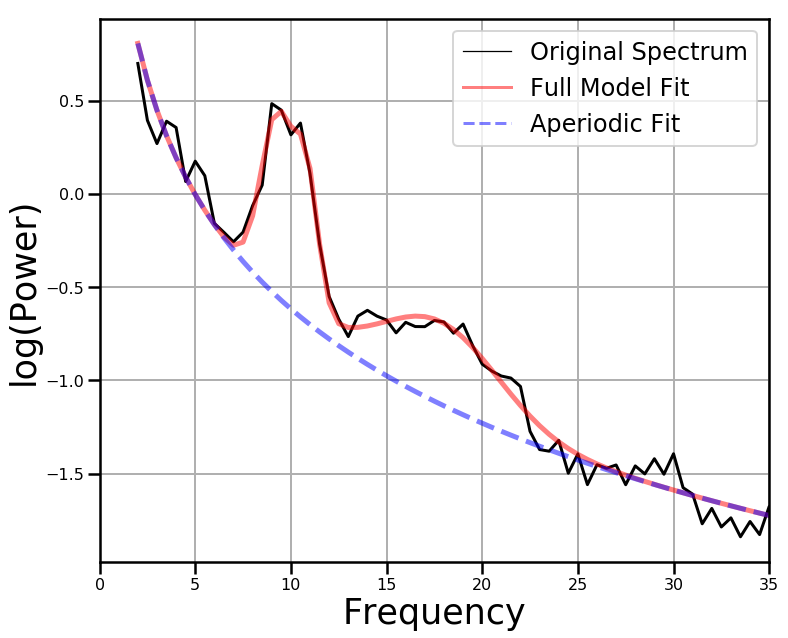

In [9]:
# Plot the power spectrum, with the FOOOF model
fm.plot()

# Plot aesthetic updates
ax = plt.gca()
ax.set_ylabel('log(Power)', {'fontsize':35})
ax.set_xlabel('Frequency', {'fontsize':35})
plt.legend(prop={'size': 24})
for line, width in zip(ax.get_lines(), [3, 5, 5]):
    line.set_linewidth(width)
ax.set_xlim([0, 35]);

# Save out the FOOOF figure
plt.savefig("../figures/OverviewFigs/FOOOF-example.pdf", dpi=300)

In the plot above, the the FOOOF model fit, in red, is plotted over the original data.

The blue dashed line is the fit of the aperiodic component of the data. The aperiodic exponent describes the steepness of this line.

For all future notebooks, the aperiodic exponent reflects values that are simulated and/or measured with the FOOOF model, reflecting the blue line. 

Periodic spectral features are simulation values and/or model fit values from the FOOOF model that measure oscillatory peaks over and above the blue dashed line. 